In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [13]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df_cleaned = df.dropna(axis=1, how='all').copy()


In [14]:
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Summary Stats ---")
print(df.describe())
print("\n--- Class Distribution ---")
print(df['target'].value_counts())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null

In [15]:
df.loc[0:5, 'bmi'] = np.nan
df.loc[10:12, 'bp'] = np.nan
print("🔹 Missing values before filling:\n", df.isnull().sum())

🔹 Missing values before filling:
 alcohol                           0
malic_acid                        0
ash                               0
alcalinity_of_ash                 0
magnesium                         0
total_phenols                     0
flavanoids                        0
nonflavanoid_phenols              0
proanthocyanins                   0
color_intensity                   0
hue                               0
od280/od315_of_diluted_wines      0
proline                           0
target                            0
bmi                             178
bp                              178
dtype: int64


In [16]:
np.random.seed(0)
for col in df.columns[:-1]:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

print("\n--- Missing After Injection ---")
print(df.isnull().sum())


--- Missing After Injection ---
alcohol                           9
malic_acid                        9
ash                               9
alcalinity_of_ash                 9
magnesium                         9
total_phenols                     9
flavanoids                        9
nonflavanoid_phenols              9
proanthocyanins                   9
color_intensity                   9
hue                               9
od280/od315_of_diluted_wines      9
proline                           9
target                            9
bmi                             178
bp                              178
dtype: int64


In [21]:
from sklearn.impute import SimpleImputer
df_cleaned = df.dropna(axis=1, how='all').copy()
features = df_cleaned.columns[:-1]
imputer = SimpleImputer(strategy='mean')
df_cleaned.loc[:, features] = imputer.fit_transform(df_cleaned[features])


In [26]:

df_cleaned = df.dropna(axis=1, how='all').copy()
features = df_cleaned.columns[:-1]  
imputer = SimpleImputer(strategy='mean')
df_cleaned.loc[:, features] = imputer.fit_transform(df_cleaned[features])
scaler = StandardScaler()
df_cleaned.loc[:, features] = scaler.fit_transform(df_cleaned[features])


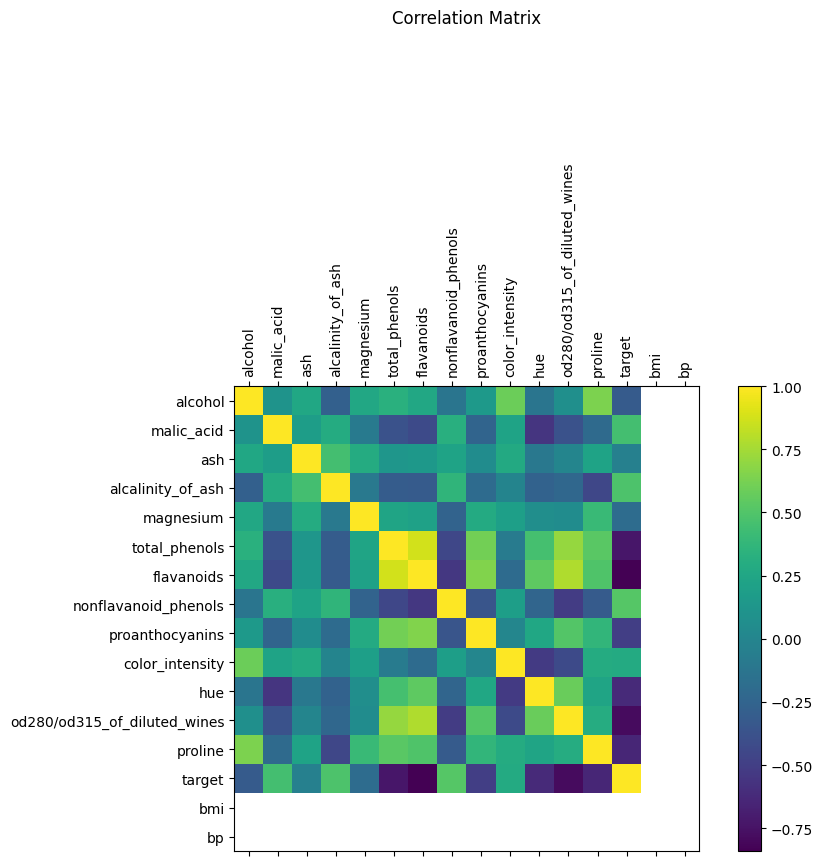

In [27]:
plt.figure(figsize=(10, 6))
plt.matshow(df.corr(), fignum=1)
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.title("Correlation Matrix", pad=100)
plt.show()

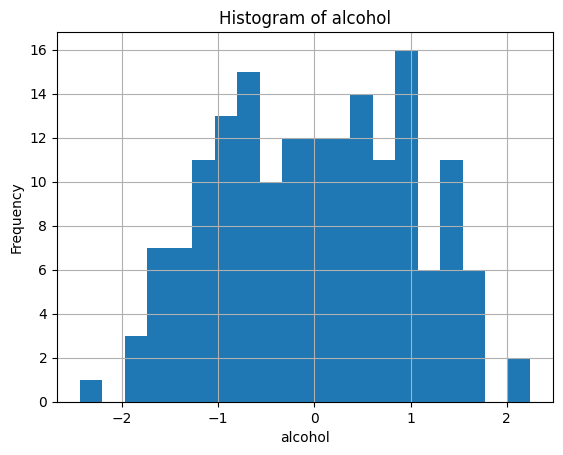

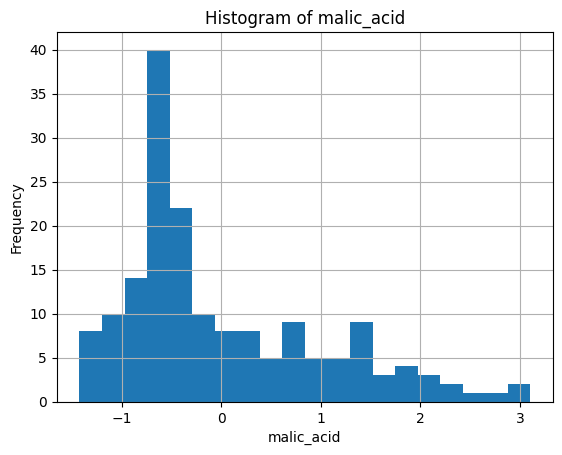

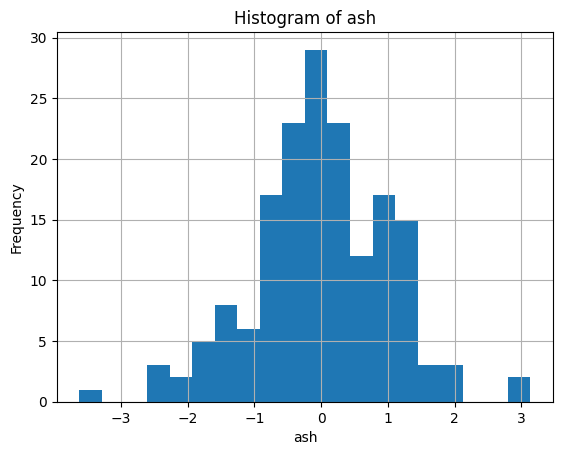

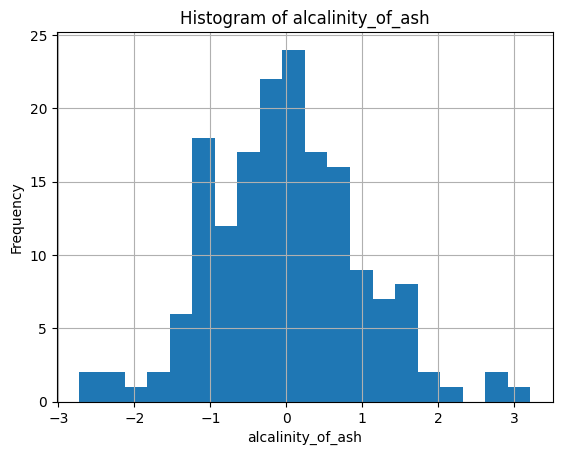

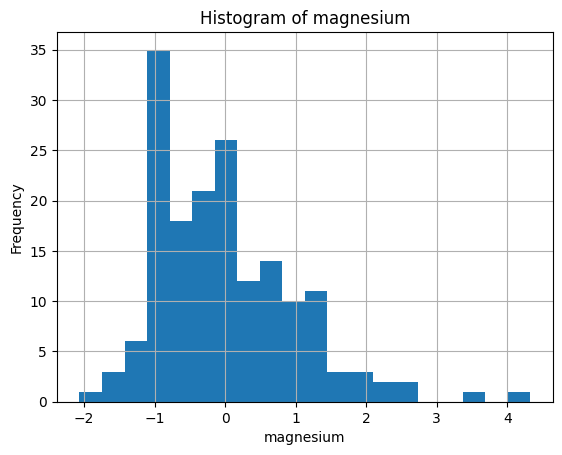

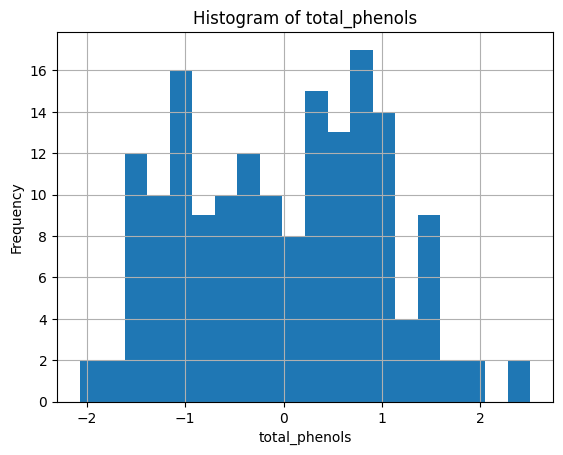

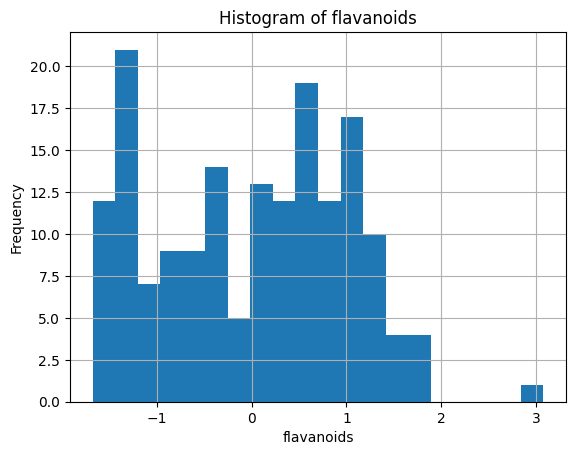

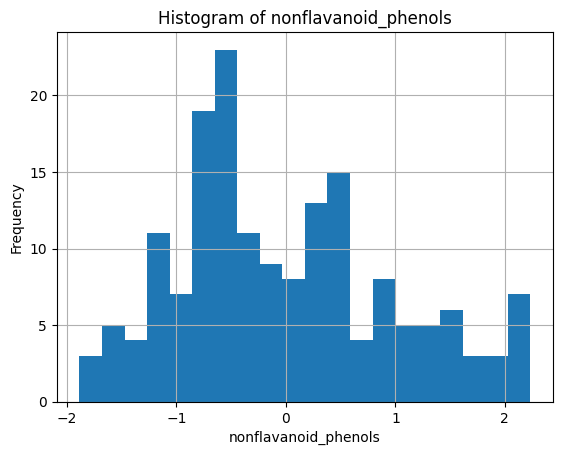

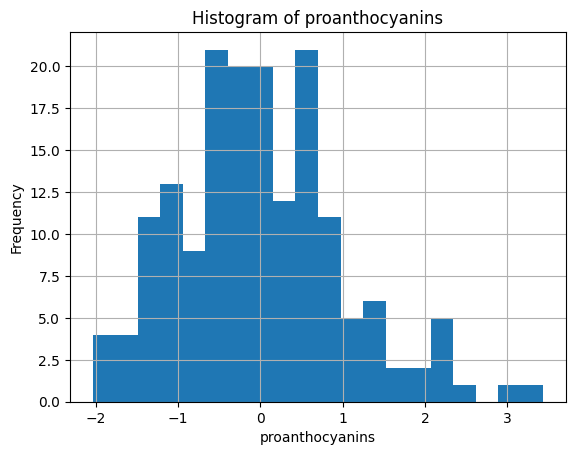

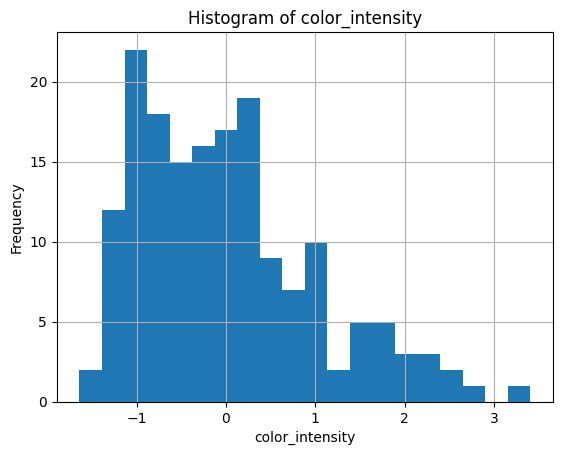

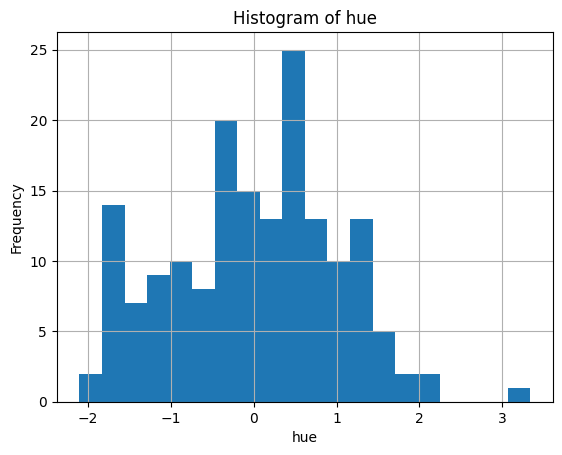

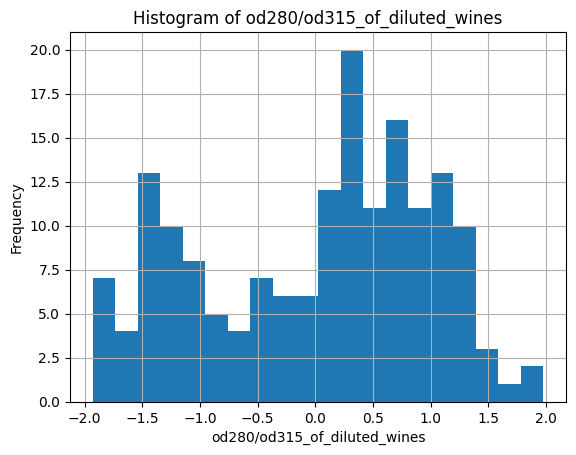

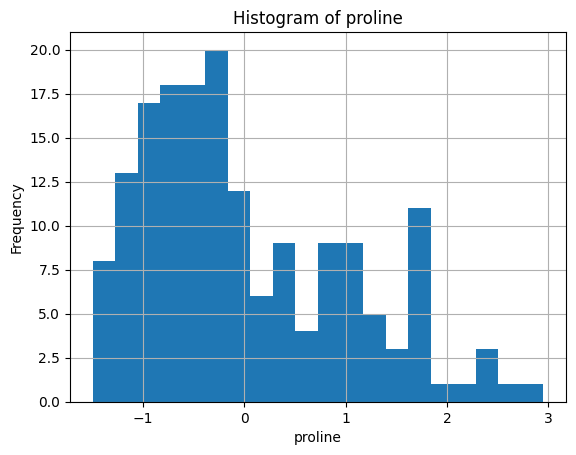

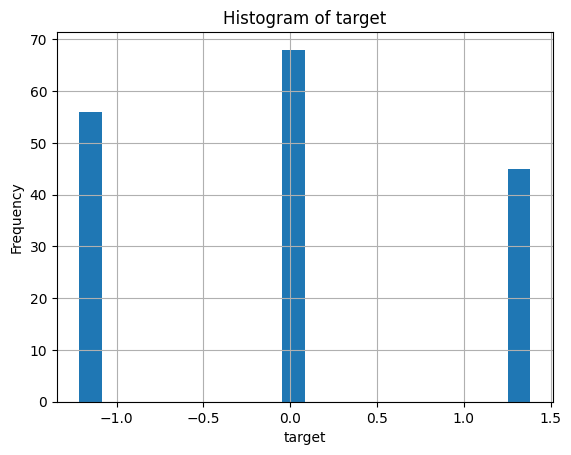

Skipping column: bmi (non-numeric or all NaN)


In [32]:

for col in df.columns[:-1]:
    if pd.api.types.is_numeric_dtype(df[col]) and df[col].notna().any():
        plt.figure()
        plt.hist(df[col].dropna(), bins=20)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
    else:
        print(f"Skipping column: {col} (non-numeric or all NaN)")

